In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
print(tf.__version__)

2.3.0


In [ ]:
from keras import callbacks
from keras.callbacks import LearningRateScheduler
from keras.utils import to_categorical

In [ ]:
fashion_minst = keras.datasets.fashion_mnist
(train_images,train_labels),  (test_images,test_labels) = fashion_minst.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
TRAIN_DS_SIZE = 40000
VALID_DS_SIZE = 10000
TEST_DS_SIZE = 10000

(fashion_mnist_train, fashion_mnist_valid, fashion_mnist_test), info = tfds.load('fashion_mnist', 
                                                               split=[f'train[:{TRAIN_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE + VALID_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE + TEST_DS_SIZE}]'],
                                                               with_info=True,
                                                               as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteCPD26G/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteCPD26G/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~2%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


>
**Note :** I make an Input pipeline with using tf.data for processing data(batch,shuffle and cach) and using AUTOTUNE for prefetch data.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
def pre_process_image(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32) ##rescaling the image
  return image, label

TRAIN_BATCH_SIZE = 32
train_batches = fashion_mnist_train.map(pre_process_image).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)
validatioin_batches = fashion_mnist_valid.map(pre_process_image).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)

In [ ]:
def make_model():
  model = models.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(64,activation='relu'))
  model.add(keras.layers.Dense(128,activation='relu'))
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [ ]:
model_initilal = make_model()

In [ ]:
fashion_mnist_test = fashion_mnist_test.map(pre_process_image).batch(32)

In [ ]:
model_initilal.compile(optimizer='sgd',
              loss=keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
%%time
history = model_initilal.fit(train_batches,epochs=100,
                   validation_data=validatioin_batches,
                    )

In [ ]:
model_initilal.evaluate(fashion_mnist_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8819


[0.37836742401123047, 0.8819000124931335]

In [ ]:
sgd = keras.optimizers.SGD(lr=0.001,momentum=0.9)


In [ ]:
model_learning_rate = make_model()

In [ ]:
model_learning_rate.compile(optimizer=sgd,loss=keras.losses.sparse_categorical_crossentropy,
                            metrics=['accuracy'])


In [ ]:
%%time
history_learning_rate = model_learning_rate.fit(train_batches,epochs=100,
                   validation_data=validatioin_batches)

In [ ]:
model_learning_rate.evaluate(fashion_mnist_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.8780


[0.3873063325881958, 0.878000020980835]

In [ ]:
model_dropout = keras.Sequential([
                keras.layers.Flatten(input_shape=(28,28)),
                keras.layers.Dense(64,activation='relu'),
                keras.layers.Dense(128,activation='relu'),
                keras.layers.Dropout(0.4),
                keras.layers.Dense(10,activation='softmax')                        
])

In [ ]:
model_dropout.compile(optimizer=keras.optimizers.SGD(),loss=keras.losses.sparse_categorical_crossentropy,
                            metrics=['accuracy'])


In [ ]:
%%time
history_dropout = model_dropout.fit(train_batches,epochs=100,
                   validation_data=validatioin_batches)

In [ ]:
model_dropout.evaluate(fashion_mnist_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3160 - accuracy: 0.8886


[0.31595319509506226, 0.8885999917984009]



Task | Model | Epochs | Training_Time | Test_Accuracy
--- | --- | --- | --- | --- |
Inital)| Fashion_mnist | 100 | 7min 14s | 0.8819
DNN adding lr| Fashion_mnist | 100 | 7min 9s | 0.8780
DNN adding drop out| Fashion_mnist | 100 | 7min 14s | 0.8886



**Note :** The accuracy Test has slightly imporved by adding dropout

In [ ]:
def make_cnn_model():
  model = models.Sequential()
  model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
  model.add(keras.layers.MaxPooling2D((2,2)))
  model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64,activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [ ]:
model_initial_cnn = make_cnn_model()

In [ ]:
model_initial_cnn.compile(optimizer='sgd',
                     loss= keras.losses.sparse_categorical_crossentropy,
                     metrics=['accuracy'])

In [ ]:
%%time 
history_initial_cnn = model_initial_cnn.fit(train_batches,epochs=100,validation_data=validatioin_batches)

In [ ]:
model_initial_cnn.evaluate(fashion_mnist_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.9103


[0.3292044699192047, 0.9103000164031982]

>\

Task | Model | Epochs | Training_Time | Test_Accuracy
--- | --- | --- | --- | --- |
Initial CNN(with dropout)| Fashion_mnist | 100 | 8min 43s | 0.9103


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~4%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

>
**Note:** I have made a pipleline by using tf.data.experimental.autotune (doing batch size ,shuffle and prefetch()) for  Task 1.1 So I use the same input pipeline for this Task And also I have made an input pipeline by loading  data from keras.dataset and use tf.data to make an Input pipeline


**Make a Transformation for Data Augmentation**

In [ ]:
def data_augmentation(images,labels):
  #images = tf.image.random_flip_left_right(images)
  #images = tf.image.resize_with_crop_or_pad(images,32,32)
  #images = tf.image.random_flip_up_down(images)
  #images = tf.image.central_crop(images,0.9)
  images = tf.image.flip_left_right(images)
  images = tf.image.rot90(images)
  images = tf.image.adjust_saturation(images,3)
  images = tf.image.adjust_brightness(images,0.4)
  images= tf.image.central_crop(images,0.5)
  return images,labels

In [ ]:
train_batches.map(data_augmentation)
validatioin_batches.map(data_augmentation)

<DatasetV1Adapter shapes: ((None, 14, 14, 1), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
model_data_augment = make_cnn_model()


In [ ]:
model_data_augment.compile(optimizer='sgd',
                     loss= keras.losses.sparse_categorical_crossentropy,
                     metrics=['accuracy'])

In [ ]:
%%time
history_data_augment = model_data_augment.fit(train_batches,epochs=100,validation_data=validatioin_batches)

In [ ]:
model_data_augment.evaluate(fashion_mnist_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6548 - accuracy: 0.8893


[0.6547605395317078, 0.8892999887466431]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [ ]:
datagen = ImageDataGenerator(
            rotation_range=0,
            width_shift_range=0,
            height_shift_range=0,
            shear_range=0,
            zoom_range=0,
            horizontal_flip=True,
            fill_mode='nearest'
)

>

**Loading data from keras dataset** to make an input pipeline and use keras.ImageDatagenerator for  data augmetation

In [ ]:
fashion_minst = keras.datasets.fashion_mnist
(train_images,train_labels),  (test_images,test_labels) = fashion_minst.load_data()

In [ ]:

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255
# x_val = x_val.reshape((10000,28,28,1))
# x_val = x_val.astype('float32')/255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
x_val = train_images[:10000].reshape(10000,28,28,1)
y_val = train_labels[:10000]

In [ ]:
x_val.shape

(10000, 28, 28, 1)

In [ ]:
##fashion_minst_train
train_dataset = tf.data.Dataset.from_tensor_slices((train_images,train_labels))

train_data = train_dataset.shuffle(buffer_size=10000)
train_data = train_dataset.batch(512)
iterator =train_data.as_numpy_iterator()

images_batch , labels_batch = iterator.next()

In [ ]:
##fashion_minst_train
validation_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val))

validation_data = validation_dataset.shuffle(buffer_size=10000)
validation_data = validation_dataset.batch(512)
iterator =validation_data.as_numpy_iterator()
x_val , y_val = iterator.next()

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_data = test_dataset.shuffle(buffer_size=10000)
test_data = test_dataset.batch(512)
iterator = test_data.as_numpy_iterator()
test_images_batch ,test_labels_batch = iterator.next()

In [ ]:
x_val.shape,images_batch.shape

((512, 28, 28, 1), (512, 28, 28, 1))

In [ ]:
model_pipeline = keras.Sequential([
               keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)) ,
               keras.layers.MaxPooling2D((2,2)),
               keras.layers.Conv2D(64,(3,3),activation='relu'),
               keras.layers.MaxPooling2D((2,2)),
               keras.layers.Conv2D(128,(3,3),activation='relu'),
               keras.layers.Flatten(),
               keras.layers.Dense(64,activation='relu') ,
               keras.layers.Dense(10,activation='softmax') 
])  

In [ ]:
model_pipeline.compile(optimizer='sgd',
                       loss=keras.losses.categorical_crossentropy,
                       metrics=['accuracy'])


In [ ]:
datagen.fit(train_images)

In [ ]:
%%time
history_pipeline = model_pipeline.fit(datagen.flow(images_batch,labels_batch),
                                              epochs=100,validation_data=(x_val,y_val))

In [ ]:
datagen.fit(test_images_batch)




In [ ]:
model_pipeline.evaluate(test_images_batch,test_labels_batch)

16/16 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.7344


[0.6937872171401978, 0.734375]

----
###### *** I have noticed significant improvement in time for making the model by creating an input pipeline with tf.data
----

### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~6%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



>
**Note :** I have used VGG16(as pretraind model) without fine_tuning and fine_tunning the last layers(block5_conv1)

In [ ]:
from keras.applications import VGG16

convolutional_base = VGG16(weights='imagenet',
                         include_top=False,
                         input_shape=(64,64,3)
                         )
convolutional_base.summary()

In [ ]:
convolutional_base.trainable = False

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
TRAIN_DS_SIZE = 40000
VALID_DS_SIZE = 10000
TEST_DS_SIZE = 10000

(fashion_mnist_train, fashion_mnist_valid, fashion_mnist_test), info = tfds.load('fashion_mnist', 
                                                               split=[f'train[:{TRAIN_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE + VALID_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE + TEST_DS_SIZE}]'],
                                                               with_info=True,
                                                               as_supervised=True)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
IMAGE_SIZE = (64,64)
def pre_process_image_rgb(image, label):
  #image = tf.
  image = tf.image.convert_image_dtype(image, tf.float32) ## Instead of manually scale the image, call a `tf.image` tool
  image = tf.image.resize(image, (IMAGE_SIZE))
  image = tf.image.grayscale_to_rgb(image)
  return image, label
TRAIN_BATCH_SIZE =32
train_batches = fashion_mnist_train.map(pre_process_image_rgb).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)
validatioin_batches = fashion_mnist_valid.map(pre_process_image_rgb).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)


In [ ]:
train_batches

<DatasetV1Adapter shapes: ((None, 64, 64, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
fashion_mnist_test

<DatasetV1Adapter shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
def make_pretrained_model():
  model = models.Sequential()
  model.add(convolutional_base)
  # model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
  # model.add(keras.layers.MaxPooling2D((2,2)))
  # model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
  # model.add(keras.layers.MaxPooling2D((2,2)))
  # model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64,activation='relu'))
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [ ]:
model_pretrained_model = models.Sequential()
model_pretrained_model.add(convolutional_base)
model_pretrained_model.add(layers.Flatten())
#model_pretrained_model.add(layers.Dense(1024,activation='relu'))
#model_pretrained_model.add(layers.Dense(512,activation='relu'))
model_pretrained_model.add(layers.Dense(256,activation='relu'))
model_pretrained_model.add(layers.Dropout(0.4))
model_pretrained_model.add(layers.Dense(10,activation='sigmoid'))

In [ ]:
model_pretrained_model = make_pretrained_model()

In [ ]:
model_pretrained_model.compile(optimizer= 'sgd',
                     loss= keras.losses.sparse_categorical_crossentropy,
                     metrics=['accuracy'])

In [ ]:
model_pretrained_model.summary()

In [ ]:
## without fine Tunning
%%time

history_pretrained_model = model_pretrained_model.fit(train_batches,
                                                      epochs=100,
                                                      validation_data=validatioin_batches,
                                                      
) 

In [ ]:
fashion_mnist_test = fashion_mnist_test.map(pre_process_image_rgb).batch(TRAIN_BATCH_SIZE)

In [ ]:
model_pretrained_model.evaluate(fashion_mnist_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2897 - accuracy: 0.8985


[0.2897176146507263, 0.8985000252723694]

In [ ]:
## Fine_Tunning

convolutional_base.trainable = True

set_trainable = False
for layer in convolutional_base.layers:
  if (layer.name == 'block5_conv1') :
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False 
      


In [ ]:
model_pretrained_model_fine_tunning = models.Sequential()
model_pretrained_model_fine_tunning.add(convolutional_base)
model_pretrained_model_fine_tunning.add(layers.Flatten())
#model_pretrained_model.add(layers.Dense(1024,activation='relu'))
#model_pretrained_model.add(layers.Dense(512,activation='relu'))
model_pretrained_model_fine_tunning.add(layers.Dense(64,activation='relu'))
#model_pretrained_model_fine_tunning.add(layers.Dropout(0.4))
model_pretrained_model_fine_tunning.add(layers.Dense(10,activation='sigmoid'))

In [ ]:
model_pretrained_model_fine_tunning.compile(optimizer= 'sgd',
                     loss= keras.losses.sparse_categorical_crossentropy,
                     metrics=['accuracy'])

In [ ]:
%%time
history_pretrained_model = model_pretrained_model_fine_tunning.fit(train_batches,epochs=100,
                                                      validation_data=validatioin_batches,
                                                     
) 

In [ ]:
model_pretrained_model_fine_tunning.evaluate(fashion_mnist_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.4271 - accuracy: 0.9338


[0.4271024763584137, 0.9337999820709229]

### Task 1.5 Performance comparison

*(weight ~4%)*

Record the test accuracy achieved at different training configurations above. Which method achieved the highest accuracy? Why did it work better for this problem?


Task | Model | Epochs | Training_Time | Test_Accuracy
--- | --- | --- | --- | --- |
Inital_CNN (loading dataset from tfds)| Convnet | 100 | 8mins 54s  |  0.8868
Input pipeline (loading dataset from tfds)| data augmentation(own transformation) | 100 | 8mins 52s  |  0.8893
Pretrained model(without fine tunnung)| VGG16 |100  | 14mins 36s | 0.8985 |
Pretrained model(with fine tunnung)| VGG16 |100  | 21mins 47s | 0.9338 |
Data augmentaion(ImageDataGenerator)| dataset from keras dataset|100  | 20.4 s | 0.7344 |

>\
**Answer:** Pretrained model with fine_tunning has the highest accuracy.
pretrained model for this instance VGG16 is trained on large dataset, so they effectively act as a generic model for small dataset(here Fashion_mnist). feature extraction technique in using pretrained models consists of taking of the convolutional base of previously trained network(VGG16) , running the new data through it and training a new classifier on it.

## Task 2 Fast training of deep networks

*(weight ~16%)*

###### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~6%, each subquestion worths ~2%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [ ]:
!nvidia-smi

Mon Sep 28 01:48:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |    825MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
Stepping:            0
CPU MHz:             2199.998
BogoMIPS:            4399.99
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            56320K
NUMA node0 CPU(s):   0-3
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_sin

>
**Answer**  My hardware specification : My system has one GPU model(Tesla P100-PCIE) with  (16280MiB ) memory.
           My system  has 4 CPU. The model of Cpu is Intel(R) Xeon(R) CPU 
           with 2.20 GHZ memory


#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [ ]:
import tensorflow_datasets as tfds
TRAIN_DS_SIZE = 30000
VALID_DS_SIZE = 10000
TEST_DS_SIZE = 10000

(cifar10_train, cifar10_valid, cifar10_test), info = tfds.load('cifar10', 
                                                               split=[f'train[:{TRAIN_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE + VALID_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE + TEST_DS_SIZE}]'],
                                                               with_info=True,
                                                               as_supervised=True)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
def pre_process_image(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32) ##rescaling the image
  return image, label

TRAIN_BATCH_SIZE = 32
train_batches = cifar10_train.map(pre_process_image).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)
validatioin_batches = cifar10_valid.map(pre_process_image).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)

In [ ]:
model = keras.Sequential([
               keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)) ,
               keras.layers.MaxPooling2D((2,2)),
               keras.layers.Conv2D(64,(3,3),activation='relu'),
               keras.layers.MaxPooling2D((2,2)),
               keras.layers.Conv2D(64,(3,3),activation='relu') ,
               keras.layers.Flatten(),
               keras.layers.Dense(64,activation='relu'),
               keras.layers.Dense(10,activation='softmax') ])               


In [ ]:
model.summary()

In [ ]:
model.compile(optimizer= keras.optimizers.SGD(),
                     loss= keras.losses.sparse_categorical_crossentropy,
                     metrics=['accuracy'])


In [ ]:
%%time
history_cirfat = model.fit(train_batches,epochs=100, validation_data=validatioin_batches,
                            )

In [ ]:
test_batches = cifar10_test.map(pre_process_image).batch(TRAIN_BATCH_SIZE)

In [ ]:
model.evaluate(test_batches)

313/313 [==============================] - 1s 4ms/step - loss: 3.8099 - accuracy: 0.6487


[3.809903860092163, 0.6486999988555908]

Task | Model | Epochs | Training_Time | Test_Accuracy
--- | --- | --- | --- | --- |
Inital_CNN | CIFAR10 | 100 | 6mins 59s  |  0.6487

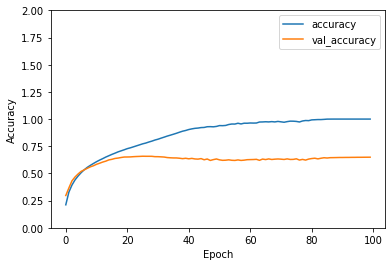

In [ ]:
plt.plot(history_cirfat.history['accuracy'],label='accuracy')
plt.plot(history_cirfat.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.xlim([1,100])
plt.ylim([0,2])
plt.legend(loc='upper right')


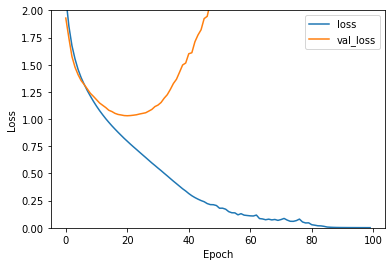

In [ ]:
plt.plot(history_cirfat.history['loss'],label='loss')
plt.plot(history_cirfat.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.xlim([1,100])
plt.ylim([0,2])
plt.legend(loc='upper right')


>
###### **Note:** The above figures shows the loss value  becomes 0 after epoch 83 and accuracy value become converges so I stop training data.

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*


**Answer:**. First I have made implemented  a default Resnet model with weight:None but the training time was high so I've used  keras.layers to creating  a custom layers in order to make a model .

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", 
                        use_bias=False,
                        kernel_regularizer=keras.regularizers.l2(0.1)
                        )

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
def make_ResNet_model ():
  model = keras.models.Sequential()
  prev_filters = 32
  c = [prev_filters, 2*prev_filters, 4*prev_filters, 4*prev_filters]
  model.add(DefaultConv2D(c[0],input_shape=[32, 32, 3]))                                                                      
  model.add(ResidualUnit(c[0], strides=1))
  model.add(ResidualUnit(c[1], strides=2))
  model.add(ResidualUnit(c[2], strides=2))
  model.add(ResidualUnit(c[3], strides=2))
  model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [ ]:
model_initial_Resnet = make_ResNet_model()

In [ ]:
model_initial_Resnet.compile(optimizer= 'sgd',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])


In [ ]:
%%time
history_Resnet = model_initial_Resnet.fit(train_batches,epochs=100,
                           validation_data=validatioin_batches,
                           )

In [ ]:
model_initial_Resnet.evaluate(test_batches)

313/313 [==============================] - 1s 5ms/step - loss: 2.5884 - accuracy: 0.4206


[2.5884146690368652, 0.4205999970436096]

In [ ]:
## it is very time_consuming model
#from keras.applications import ResNet50
#baseModel =  ResNet50(include_top=False,weights=None,input_shape=(32,32,3))

### Task 2.2 Fast training of ResNet

*(weight ~5%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

>
###### **Note:** I make models with using step decay learning rate and the exponential learning rate in callbacks function. Training time has been reduced with expontial learning rate. Both of step decay learning rate and the expontential learning rate have significant improvment in Test Accuracy.

In [ ]:
from keras import callbacks
from keras.callbacks import LearningRateScheduler

In [ ]:
def step_decay(epoch):
  initial_lrate = 0.1
  drop = 0.5
  epochs_drop =10.0
  #lrate = initial_lrate * np.math.pow(drop,np.math.floor((epoch)/epochs_drop))
  lrate = (initial_lrate)*(1/(1+(epochs_drop*epoch)))
  return lrate



In [ ]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))

In [ ]:
loss_history = LossHistory()
lrate = LearningRateScheduler(step_decay)
callbacks_list = [loss_history,lrate]


In [ ]:
model_step_decay = make_ResNet_model()

In [ ]:
model_step_decay.compile(optimizer= 'sgd',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
## Step Decay learning rate
%%time
history_step_decay = model_step_decay.fit(train_batches,
                               epochs=100,
                               callbacks=callbacks_list,                              
                               validation_data=validatioin_batches)

In [ ]:
model_step_decay.evaluate(test_batches)

313/313 [==============================] - 1s 5ms/step - loss: 1.3137 - accuracy: 0.6834


[1.3137211799621582, 0.6833999752998352]

In [ ]:
model_exponential_lr = make_ResNet_model()

In [ ]:
model_exponential_lr.compile(optimizer='sgd',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
## Exponential learning rate 
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate




loss_history = LossHistory()
lrate = LearningRateScheduler(exp_decay)
callbacks_list_exponential= [loss_history,lrate]     



In [ ]:
%%time
history_exponential_decay = model_exponential_lr.fit(train_batches,
                               validation_data=validatioin_batches,
                               epochs=100,
                               callbacks=callbacks_list_exponential,
                               )
# history_exponential_decay = model.fit(train_batches,
#                                steps_per_epoch=30,
#                                epochs=100,
#                                callbacks=callbacks_list,
#                                validation_steps=30,
#                                validation_data=validatioin_batches)

In [ ]:
model_exponential_lr.evaluate(test_batches)

313/313 [==============================] - 1s 5ms/step - loss: 0.8687 - accuracy: 0.7790


[0.868664562702179, 0.7789999842643738]

### Task 2.3 Performance comparison

*(weight ~5%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

Model | Task | Epochs | Training_Time | Test_Accuracy
--- | --- | --- | --- | --- |
Inital_ResNet | CIFAR10(ResNet) | 100 | 14min 43s  |  0.4206
Step_decay_learning_rate | CIFAR10(ResNet) | 100 | 14min 53s  |  0.6834
Exponential_learning_rate | CIFAR10(ResNet) | 100 | 14min 31s  |  0.7790 


**Answer** :    with almost same training time the model with  exponential_learning _rate has the highest accuracy. it is clear from the results  making a model with  using step decay leaening rate or Exponential learning rate has significant improvment in the Test accuracy.

## Task 3 Design a novel deep neural network model (Challenge Task for Targeting HD Grades)

*(weight ~11%)*
Here, you have to show your critical idea to design a new neural network model. We will evaluate your results based on the novelty of the model and performance of the model. 

### Task 3.1: The key idea to design a novel deep neural networks for CIFAR10

*(weight ~5%)*

In this task, you will design a novel deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem. Different from Task 2, in this task you are required to design a novel neural network and optimize the performance in classification. In your answer, you have to clearly present what the key difference between your model and the classic ones, what the benefits in your design model.

------

**Answer :** I have used the same initial model ( ResNet ) with data Augmentation and exponential learning rate for callbacks function which I have used in Task 2 . I have tried to add a simple custom loss function to calculate average loss by prediction probabilty and target by selecting tf.keras.losses.SparseCategoricalCrossentropy as loss function . I have used gradient to optimize the model. I have increased filter size for convolutional layers in ResNet model and also used GlobelMaxpooling instead of Maxpooling.The highest Test accuracy I have achieved is 0.8133 which is slightly better last model I have made in Task2 with Test accuracy 0.7790.



### Task 3.2: The implementation of the novel deep neural networks for CIFAR10

*(weight ~6%)*

In this task, it requires you to write the codes for model implementation and report the performance. In your results, you have to demonstrate the compared performance of your new model and the state-of-the-art models.

In [ ]:
import tensorflow_datasets as tfds
TRAIN_DS_SIZE = 30000
VALID_DS_SIZE = 10000
TEST_DS_SIZE = 10000

(cifar10_train, cifar10_valid, cifar10_test), info = tfds.load('cifar10', 
                                                               split=[f'train[:{TRAIN_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE}]', 
                                                                      f'train[{TRAIN_DS_SIZE + VALID_DS_SIZE}:{TRAIN_DS_SIZE + VALID_DS_SIZE + TEST_DS_SIZE}]'],
                                                               with_info=True,
                                                               as_supervised=True)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
def pre_process_image(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32) ##rescaling the image
  return image, label

TRAIN_BATCH_SIZE = 32
train_batches = cifar10_train.map(pre_process_image).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)
validatioin_batches = cifar10_valid.map(pre_process_image).batch(TRAIN_BATCH_SIZE).shuffle(buffer_size=1000).cache().prefetch(AUTOTUNE)

In [ ]:
test_batches = cifar10_test.map(pre_process_image).batch(TRAIN_BATCH_SIZE)

In [ ]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", 
                        use_bias=False,
                        kernel_regularizer=keras.regularizers.l2(0.1)
                        )

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            #keras.layers.MaxPooling2D((2,2)),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            #keras.layers.MaxPooling2D((2,2)),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [ ]:
def make_ResNet_model ():
  model = keras.models.Sequential()
  prev_filters = 32
  c = [prev_filters, 4*prev_filters, 8*prev_filters, 8*prev_filters ]
  model.add(DefaultConv2D(c[0],input_shape=[32, 32, 3]))                                                                      
  model.add(ResidualUnit(c[0], strides=1))
  model.add(ResidualUnit(c[1], strides=2))
  model.add(ResidualUnit(c[2], strides=2)) 
  model.add(ResidualUnit(c[3], strides=2))
  model.add(keras.layers.GlobalMaxPooling2D(data_format='channels_last'))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [ ]:
model_novel = make_ResNet_model()
model_novel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
residual_unit_4 (ResidualUni (None, 32, 32, 32)        18688     
_________________________________________________________________
residual_unit_5 (ResidualUni (None, 16, 16, 128)       189952    
_________________________________________________________________
residual_unit_6 (ResidualUni (None, 8, 8, 256)         920576    
_________________________________________________________________
residual_unit_7 (ResidualUni (None, 4, 4, 256)         1248256   
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 256)               0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [ ]:
## first one
def data_augmentation(images,labels):
  IMAGE_SIZE = (64,64)
  #images = tf.image.random_flip_left_right(images)
  image = tf.image.resize(images, (IMAGE_SIZE))
  #image = tf.image.rgb_to_grayscale(images)
  images = tf.image.resize_with_crop_or_pad(images,32,32)
  #images = tf.image.random_flip_up_down(images)
  #images = tf.image.central_crop(images,0.9)
  images = tf.image.flip_left_right(images)
  images = tf.image.rot90(images)
  
  return images,labels

In [ ]:
train_batches = train_batches.map(data_augmentation)
validatioin_batches = validatioin_batches.map(data_augmentation)
test_batches = test_batches.map(data_augmentation)

In [ ]:
## Exponential learning rate 
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(exp_decay(len(self.losses)))

def exp_decay(epoch):
    initial_lrate = 0.1
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate
loss_history = LossHistory()
lrate = LearningRateScheduler(exp_decay)
callbacks_list_exponential= [loss_history,lrate]     

In [ ]:
## defining a custom loss function 
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
def loss(model, x, y, training):
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)
def grad(model, inputs, targets):
  ## optimize the model with gradient
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)
for x, y in train_batches:
  loss_value, grads = grad(model_novel, x, y)
  optimizer.apply_gradients(zip(grads, model_novel.trainable_variables))

In [ ]:
model_novel.compile(optimizer=optimizer,loss = keras.losses.sparse_categorical_crossentropy,
                       metrics=['accuracy'])

In [ ]:
%%time
history_novel = model_novel.fit(train_batches,epochs=100,validation_data=validatioin_batches,callbacks=callbacks_list_exponential)

In [ ]:
model_novel.evaluate(test_batches)

313/313 [==============================] - 2s 5ms/step - loss: 0.7452 - accuracy: 0.8133


[0.7451620697975159, 0.8133000135421753]

Model | Task | Epochs | Training_Time | Test_Accuracy
--- | --- | --- | --- | --- |
Novel_model| CIFAR10(ResNet) | 100 | 21min 28s  |  0.8133
Exponential_learning_rate | CIFAR10(ResNet) | 100 | 14min 31s  |  0.7790 